In [3]:
from datasets import load_dataset

# 加载数据集
dataset = load_dataset("/home/lmh/.cache/huggingface/hub/datasets--timm--resisc45")

# 查看数据集信息
print(dataset)

# 访问训练集
train_data = dataset["train"]

# 查看第一条数据
print(train_data[0])

DataFilesNotFoundError: No (supported) data files found in /home/lmh/.cache/huggingface/hub/datasets--timm--resisc45

In [4]:
import torch
from torchvision import transforms

transforms.ToTensor()(train_data[0]["image"])

tensor([[[0.1569, 0.1608, 0.1608,  ..., 0.1490, 0.1529, 0.1490],
         [0.1490, 0.1529, 0.1569,  ..., 0.1490, 0.1451, 0.1451],
         [0.1412, 0.1451, 0.1490,  ..., 0.1373, 0.1373, 0.1333],
         ...,
         [0.2039, 0.2157, 0.2235,  ..., 0.1569, 0.2431, 0.2353],
         [0.2078, 0.2196, 0.2314,  ..., 0.1804, 0.2353, 0.2353],
         [0.2157, 0.2235, 0.2392,  ..., 0.2118, 0.2157, 0.1961]],

        [[0.2784, 0.2824, 0.2824,  ..., 0.2157, 0.2196, 0.2157],
         [0.2706, 0.2745, 0.2784,  ..., 0.2157, 0.2118, 0.2118],
         [0.2627, 0.2667, 0.2706,  ..., 0.2039, 0.2039, 0.2000],
         ...,
         [0.3176, 0.3294, 0.3373,  ..., 0.2392, 0.3333, 0.3333],
         [0.3216, 0.3333, 0.3451,  ..., 0.2627, 0.3255, 0.3333],
         [0.3294, 0.3373, 0.3529,  ..., 0.2941, 0.3059, 0.2941]],

        [[0.2471, 0.2510, 0.2510,  ..., 0.1843, 0.1882, 0.1843],
         [0.2392, 0.2431, 0.2471,  ..., 0.1843, 0.1804, 0.1804],
         [0.2314, 0.2353, 0.2392,  ..., 0.1725, 0.1725, 0.

In [28]:
import torch
from torchvision import datasets, transforms

# 加载 FashionMNIST 训练集
path="/home/lmh/projects_dir/graduate/RememberThePast-DatasetDistillation/myTest"
dataset = datasets.FashionMNIST(root=path, train=True, download=True, transform=transforms.ToTensor())

# 获取所有图像数据
data = torch.stack([img[0] for img in dataset])  # shape: [N, 1, 28, 28]

# 计算 mean 和 std
mean = data.mean()
std = data.std()

print(f"Mean: {mean:.4f}, Std: {std:.4f}")


/home/lmh/anaconda3/envs/RememberThePast/lib/python3.10/site-packages/torchvision/datasets/mnist.py:81: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/home/lmh/anaconda3/envs/RememberThePast/lib/python3.10/site-packages/torchvision/datasets/mnist.py:76: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


KeyboardInterrupt: 

In [15]:
from datasets import load_dataset

# 加载数据集
dataset = load_dataset("/home/lmh/.cache/huggingface/hub/datasets--timm--resisc45")

# 定义 ToTensor 转换
to_tensor = transforms.ToTensor()

# 计算 mean 和 std 的函数
def compute_mean_std(dataset):
    images = torch.stack([to_tensor(img["image"]) for img in dataset])  # shape: [N, C, H, W]
    mean = images.mean(dim=[0, 2, 3])
    std = images.std(dim=[0, 2, 3])
    return mean.tolist(), std.tolist()

# 遍历 DatasetDict 的所有 split
for split in dataset.keys():
    mean, std = compute_mean_std(dataset[split])
    print(f"{split} - Mean: {mean}, Std: {std}")


train - Mean: [0.36821138858795166, 0.3808315396308899, 0.3434024453163147], Std: [0.20333018898963928, 0.18524153530597687, 0.1845611333847046]
validation - Mean: [0.36654603481292725, 0.38029745221138, 0.342844158411026], Std: [0.20282503962516785, 0.18475109338760376, 0.18450134992599487]
test - Mean: [0.3689153492450714, 0.3820919096469879, 0.34481802582740784], Std: [0.2044672966003418, 0.18665112555027008, 0.1862463802099228]


In [18]:
for img in dataset["train"]:
    print(to_tensor(img["image"]).shape)
    break

torch.Size([3, 256, 256])


<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256 at 0x7F127FE424D0>


(np.float64(-0.5), np.float64(127.5), np.float64(127.5), np.float64(-0.5))

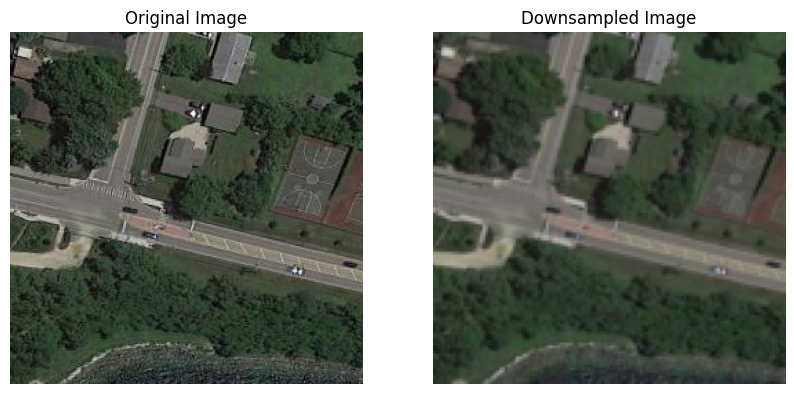

In [26]:
val_dataset=load_dataset("/home/lmh/.cache/huggingface/hub/datasets--timm--resisc45", split='validation')
print(val_dataset[0]["image"])    
import torchvision.transforms.functional as F
import matplotlib.pyplot as plt

# Downsample the first image in the validation dataset
image = val_dataset[23]["image"]
re_im_size=128
downsampled_image = F.resize(image, (re_im_size, re_im_size))  # Downsample to 128x128

# Show the original and downsampled images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image)  # Change from CxHxW to HxWxC for displaying
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Downsampled Image")
plt.imshow(downsampled_image)  # Change from CxHxW to HxWxC for displaying
plt.axis('off')

# plt.show()

In [25]:
# 给 dataset 设置 transform
transform = transforms.Compose([transforms.ToTensor()])
def transform_fn(batch):
    batch["image"] = [transform(img) for img in batch["image"]]
    return batch

val_dataset.set_transform(transform_fn)
print(val_dataset[0])      

{'image': tensor([[[0.1804, 0.2118, 0.2314,  ..., 0.1216, 0.1255, 0.1294],
         [0.2000, 0.2275, 0.2275,  ..., 0.1098, 0.1255, 0.1373],
         [0.1804, 0.2039, 0.2078,  ..., 0.1098, 0.1333, 0.1373],
         ...,
         [0.4902, 0.4157, 0.2431,  ..., 0.2078, 0.2549, 0.3843],
         [0.5176, 0.4706, 0.2588,  ..., 0.3020, 0.3569, 0.3961],
         [0.4706, 0.5333, 0.3843,  ..., 0.3373, 0.3294, 0.2196]],

        [[0.2118, 0.2549, 0.2745,  ..., 0.2196, 0.2235, 0.2275],
         [0.2314, 0.2588, 0.2706,  ..., 0.2078, 0.2235, 0.2353],
         [0.2157, 0.2392, 0.2549,  ..., 0.2078, 0.2314, 0.2353],
         ...,
         [0.5412, 0.4667, 0.2980,  ..., 0.2510, 0.2980, 0.4275],
         [0.5686, 0.5216, 0.3137,  ..., 0.3451, 0.4000, 0.4392],
         [0.5216, 0.5843, 0.4392,  ..., 0.3804, 0.3725, 0.2627]],

        [[0.2863, 0.3255, 0.3529,  ..., 0.2353, 0.2431, 0.2471],
         [0.3059, 0.3333, 0.3412,  ..., 0.2275, 0.2431, 0.2549],
         [0.2824, 0.3059, 0.3176,  ..., 0.2275, 

In [14]:
len(val_dataset.features["label"].names)

45

In [17]:
val_dataset[0]["image"]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256>,
 'label': 33,
 'image_id': 'roundabout_283'}

In [23]:
import datasets
from datasets import load_dataset
print(datasets.__version__)
dataset = load_dataset("/home/lmh/.cache/huggingface/hub/datasets--timm--resisc45")

3.5.0


In [1]:
import datasets
from datasets import load_dataset
from torchvision import transforms
print(datasets.__version__)
train_dataset = load_dataset("/home/lmh/.cache/huggingface/hub/datasets--timm--resisc45",split='train')
# 给 dataset 设置 transform
transform = transforms.Compose([transforms.ToTensor()])
def transform_fn(batch):
    batch["image"] = [transform(img) for img in batch["image"]]
    return batch

train_dataset.set_transform(transform_fn)
print(train_dataset[0])      

3.5.0
{'image': tensor([[[0.1569, 0.1608, 0.1608,  ..., 0.1490, 0.1529, 0.1490],
         [0.1490, 0.1529, 0.1569,  ..., 0.1490, 0.1451, 0.1451],
         [0.1412, 0.1451, 0.1490,  ..., 0.1373, 0.1373, 0.1333],
         ...,
         [0.2039, 0.2157, 0.2235,  ..., 0.1569, 0.2431, 0.2353],
         [0.2078, 0.2196, 0.2314,  ..., 0.1804, 0.2353, 0.2353],
         [0.2157, 0.2235, 0.2392,  ..., 0.2118, 0.2157, 0.1961]],

        [[0.2784, 0.2824, 0.2824,  ..., 0.2157, 0.2196, 0.2157],
         [0.2706, 0.2745, 0.2784,  ..., 0.2157, 0.2118, 0.2118],
         [0.2627, 0.2667, 0.2706,  ..., 0.2039, 0.2039, 0.2000],
         ...,
         [0.3176, 0.3294, 0.3373,  ..., 0.2392, 0.3333, 0.3333],
         [0.3216, 0.3333, 0.3451,  ..., 0.2627, 0.3255, 0.3333],
         [0.3294, 0.3373, 0.3529,  ..., 0.2941, 0.3059, 0.2941]],

        [[0.2471, 0.2510, 0.2510,  ..., 0.1843, 0.1882, 0.1843],
         [0.2392, 0.2431, 0.2471,  ..., 0.1843, 0.1804, 0.1804],
         [0.2314, 0.2353, 0.2392,  ..., 0.

In [4]:
from torch.utils.data import DataLoader
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
for batch in train_loader:
    print(batch["image"].shape)
    break

torch.Size([128, 3, 256, 256])


In [25]:
im_size = (128, 128)
mean = [0.3682, 0.3808, 0.3434]
std = [0.2033, 0.1852, 0.1845]
transform_seq = [transforms.Resize(im_size), transforms.ToTensor(), transforms.Normalize(mean=mean, std=std)]
transform = transforms.Compose(transform_seq)
transform(dataset["train"][0]["image"])

tensor([[[-1.0395, -1.0588, -1.0781,  ..., -1.1167, -1.0974, -1.0974],
         [-1.1167, -1.0974, -1.1167,  ..., -1.0588, -1.1360, -1.1167],
         [-1.1360, -1.1167, -1.1167,  ..., -1.0010, -1.0010, -0.9817],
         ...,
         [-0.6923, -0.6923, -0.7116,  ..., -0.5187, -0.5959, -0.7309],
         [-0.7502, -0.6923, -0.7116,  ..., -0.5766, -0.8659, -0.7502],
         [-0.7309, -0.6537, -0.6345,  ..., -0.5187, -0.8273, -0.7309]],

        [[-0.5527, -0.5739, -0.6163,  ..., -0.9339, -0.9127, -0.9127],
         [-0.6374, -0.6163, -0.6586,  ..., -0.8704, -0.9551, -0.9339],
         [-0.6586, -0.6374, -0.6586,  ..., -0.8068, -0.8068, -0.7857],
         ...,
         [-0.2139, -0.2351, -0.2563,  ..., -0.4045, -0.3410, -0.4045],
         [-0.2775, -0.2351, -0.2351,  ..., -0.4680, -0.6163, -0.4045],
         [-0.2563, -0.1716, -0.1504,  ..., -0.4257, -0.5739, -0.3833]],

        [[-0.5222, -0.5434, -0.5859,  ..., -0.9048, -0.8835, -0.8835],
         [-0.6072, -0.5859, -0.6284,  ..., -0